Two moving averages can be used together to generate crossover signals. In Technical Analysis this is the “double crossover method”. Double crossovers involve one relatively short moving average and one relatively long moving average. As with all moving averages, the general length of the moving average defines the timeframe for the system. A system using a 5-day SMA and 35-day SMA would be deemed short-term. A system using a 50-day SMA and 200-day SMA would be deemed medium-term, perhaps even long-term.

A bullish crossover occurs when the shorter moving average crosses above the longer moving average. This is also known as a golden cross.

A bearish crossover occurs when the shorter moving average crosses below the longer moving average. This is known as a dead cross.

In [46]:
#Importing libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import math
plt.style.use('fivethirtyeight')

In [3]:
#setting up dataframe
AAPL = yf.Ticker('AAPL')
AAPL_df = AAPL.history(start="2013-01-01",end="2018-12-31")
AAPL_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-12-31,15.844896,16.616767,15.797412,16.516520,659492400,0.0,0.0
2013-01-02,17.188453,17.225076,16.810123,17.039789,560518000,0.0,0.0
2013-01-03,17.004104,17.059659,16.790575,16.824715,352965200,0.0,0.0
2013-01-04,16.665493,16.717013,16.319749,16.356062,594333600,0.0,0.0
2013-01-07,16.200882,16.427446,15.989836,16.259851,484156400,0.0,0.0
...,...,...,...,...,...,...,...
2018-12-21,38.246567,38.563541,36.483705,36.751911,382978400,0.0,0.0
2018-12-24,36.122843,36.951855,35.742475,35.800995,148676800,0.0,0.0
2018-12-26,36.159418,38.336784,35.774173,38.322155,234330000,0.0,0.0


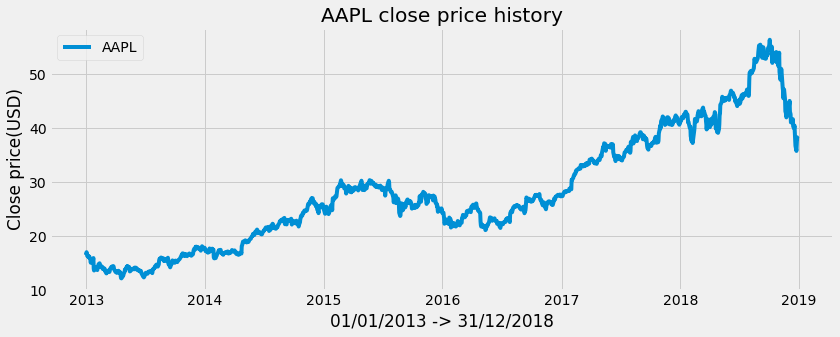

In [26]:
#visualisation
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL_df['Close'], label = 'AAPL')
plt.title('AAPL close price history')
plt.xlabel('01/01/2013 -> 31/12/2018')
plt.ylabel('Close price(USD)')
plt.legend(loc = 'upper left')
plt.show()

In [6]:
#SMA with 30 days window
SMA30 = pd.DataFrame()
SMA30['Close Price'] = AAPL_df['Close'].rolling(window=30).mean()
#SMA with 100 day window
SMA100=pd.DataFrame()
SMA100['Close Price'] = AAPL_df['Close'].rolling(window=100).mean()

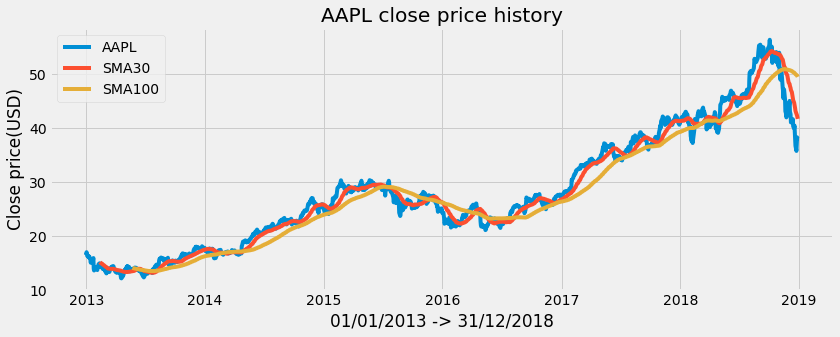

In [27]:
#visualisation
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL_df['Close'], label = 'AAPL')
plt.plot(SMA30['Close Price'], label = 'SMA30')
plt.plot(SMA100['Close Price'], label = 'SMA100')
plt.title('AAPL close price history')
plt.xlabel('01/01/2013 -> 31/12/2018')
plt.ylabel('Close price(USD)')
plt.legend(loc = 'upper left')
plt.show()

In [7]:
#creating new dataframe to store data
data_US = pd.DataFrame()
data_US['AAPL'] = AAPL_df['Close']
data_US['SMA30'] = SMA30['Close Price']
data_US['SMA100'] = SMA100['Close Price']
data_US

,AAPL,SMA30,SMA100
Date,,,
2012-12-31,16.516520,NaN,NaN
2013-01-02,17.039789,NaN,NaN
2013-01-03,16.824715,NaN,NaN
2013-01-04,16.356062,NaN,NaN
2013-01-07,16.259851,NaN,NaN
...,...,...,...
2018-12-21,36.751911,43.221275,50.010270
2018-12-24,35.800995,42.720131,49.880390
2018-12-26,38.322155,42.335699,49.761459


In [10]:
#Strategy function for signalling
def strategy(data):
    signal_price_buy = []
    signal_price_sell = []
    flag = -1
    net_pnl = [0]
    
    for i in range(len(data)):
        if data['SMA30'][i] > data['SMA100'][i]:
            if flag != 1:
                signal_price_buy.append(data['AAPL'][i])
                signal_price_sell.append(np.nan)
                flag = 1
            else:
                signal_price_buy.append(np.nan)
                signal_price_sell.append(np.nan)
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:
                signal_price_buy.append(np.nan)
                signal_price_sell.append(data['AAPL'][i])
                flag = 0
            else:
                signal_price_buy.append(np.nan)
                signal_price_sell.append(np.nan)
        else:
            signal_price_buy.append(np.nan)
            signal_price_sell.append(np.nan)
    return (signal_price_buy, signal_price_sell, net_pnl)

In [11]:
#store buy and sell data in a variable
buy_sell = strategy(data_US)
data_US['Buy_Signal_Price'] = buy_sell[0]
data_US['Sell_Signal_Price'] = buy_sell[1]
#show the data
data_US

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2012-12-31,16.516520,NaN,NaN,NaN,NaN
2013-01-02,17.039789,NaN,NaN,NaN,NaN
2013-01-03,16.824715,NaN,NaN,NaN,NaN
2013-01-04,16.356062,NaN,NaN,NaN,NaN
2013-01-07,16.259851,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2018-12-21,36.751911,43.221275,50.010270,NaN,NaN
2018-12-24,35.800995,42.720131,49.880390,NaN,NaN
2018-12-26,38.322155,42.335699,49.761459,NaN,NaN


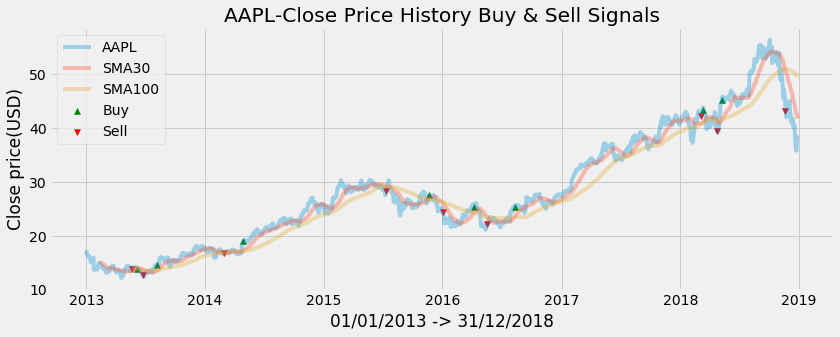

In [28]:
#visualise data and strategy
plt.figure(figsize = (12.5, 4.5))
plt.plot(data_US['AAPL'], label = 'AAPL', alpha = 0.35)
plt.plot(data_US['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data_US['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data_US.index, data_US['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data_US.index, data_US['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('AAPL-Close Price History Buy & Sell Signals')
plt.xlabel('01/01/2013 -> 31/12/2018')
plt.ylabel('Close price(USD)')
plt.legend(loc = 'upper left')
plt.show()

214.28343677520752 USD is the spent amount.
243.02134323120117 USD is the gained amount.
28.737906455993652 USD is the net PnL.
Congratulations! NET PROFIT.


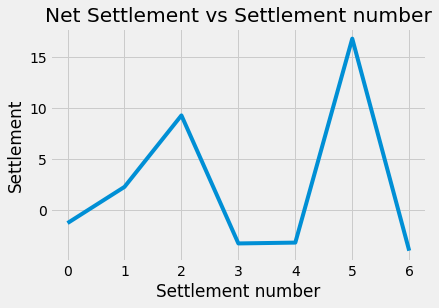

In [55]:
#Calculating PnL and visualising
Buy = data_US['Buy_Signal_Price'].sum()
Sell = data_US['Sell_Signal_Price'].sum()
pnl = Sell-Buy   
print(str(Buy) + " USD is the spent amount.")
print(str(Sell) + " USD is the gained amount.")
print(str(pnl) + " USD is the net PnL.")
if pnl >= 0:
    print('Congratulations! NET PROFIT.')
else:
    print('Oops! NET LOSS.')
Buy_list = []
Sell_list = []
pnl_list = []
for i in data_US['Buy_Signal_Price']:
        Buy_list.append(i)
for j in data_US['Sell_Signal_Price']:
        Sell_list.append(j)
cleanedList_buy = [x for x in Buy_list if (math.isnan(x) == False)]
cleanedList_sell = [x for x in Sell_list if (math.isnan(x) == False)]
cleanedList_sell.pop(0)        #we have to buy a stock first 
for i in range(0,len(cleanedList_buy)-1):
    pnl_list.append(cleanedList_sell[i]-cleanedList_buy[i])
plt.plot(pnl_list)
plt.title('Net Settlement vs Settlement number')
plt.xlabel('Settlement number')  #First settlement number corresponds to first settlement
plt.ylabel('Settlement')
plt.show()
